In [1]:
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [2]:
!pip install xlrd
!pip install wordcloud

In [3]:
df_can = pd.ExcelFile('Canada (2).xlsx')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df_can.sheet_names

['Regions by Citizenship',
 'Canada by Citizenship',
 'Canada by Citizenship (2)']

In [5]:
df_can = df_can.parse(u'Canada by Citizenship', skiprows=range(20), skipfooter=2)
df_can

Type    Coverage          OdName  AREA AreaName   REG  \
0    Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1    Immigrants  Foreigners         Albania   908   Europe   925   
2    Immigrants  Foreigners         Algeria   903   Africa   912   
3    Immigrants  Foreigners  American Samoa   909  Oceania   957   
4    Immigrants  Foreigners         Andorra   908   Europe   925   
..          ...         ...             ...   ...      ...   ...   
190  Immigrants  Foreigners        Viet Nam   935     Asia   920   
191  Immigrants  Foreigners  Western Sahara   903   Africa   912   
192  Immigrants  Foreigners           Yemen   935     Asia   922   
193  Immigrants  Foreigners          Zambia   903   Africa   910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa   910   

                RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0         Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1       Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2       Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3             Polynesia  902  Developing regions     0  ...     0     0     1   
4       Southern Europe  901   Developed regions     0  ...     0     0     1   
..                  ...  ...                 ...   ...  ...   ...   ...   ...   
190  South-Eastern Asia  902  Developing regions  1191  ...  1816  1852  3153   
191     Northern Africa  902  Developing regions     0  ...     0     0     1   
192        Western Asia  902  Developing regions     1  ...   124   161   140   
193      Eastern Africa  902  Developing regions    11  ...    56    91    77   
194      Eastern Africa  902  Developing regions    72  ...  1450   615   454   

     2007  2008  2009  2010  2011  2012  2013  
0    2652  2111  1746  1758  2203  2635  2004  
1     702   560   716   561   539   620   603  
2    3623  4005  5393  4752  4325  3774  4331  
3       0     0     0     0     0     0     0  
4       1     0     0     0     0     1     1  
..    ...   ...   ...   ...   ...   ...   ...  
190  2574  1784  2171  1942  1723  1731  2112  
191     0     0     0     0     0     0     0  
192   122   133   128   211   160   174   217  
193    71    64    60   102    69    46    59  
194   663   611   508   494   434   437   407  

[195 rows x 43 columns]

In [6]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [7]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


In [8]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quicly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] = df_can.sum (axis = 1)

# years that we will be using in this lesson - usefull for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9072\2672198979.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum (axis = 1)


In [9]:
### VISUALIZINGG DATA USING MATPLOTLIB ###

In [10]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


In [11]:
### WAFFLE CHARTS ###

In [12]:
# let's create a new dataframe for these three counties
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  2011  \
Country                    ...                                             
Denmark    93    73    93  ...    62   101    97   108    81    92    93   
Norway     31    54    56  ...    57    53    73    66    75    46    49   
Sweden    128   158   187  ...   205   139   193   165   167   159   134   

         2012  2013  Total  
Country                     
Denmark    94    81   3901  
Norway     53    59   2327  
Sweden    140   140   5866  

[3 rows x 38 columns]

In [13]:
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [14]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [15]:
# compute the number of tiles for each category
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [16]:
# initialize the waffle chart as an empt matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        
        # if the number of tile populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
print ('Waffle chart populated!')

Waffle chart populated!


In [17]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 640x480 with 0 Axes>

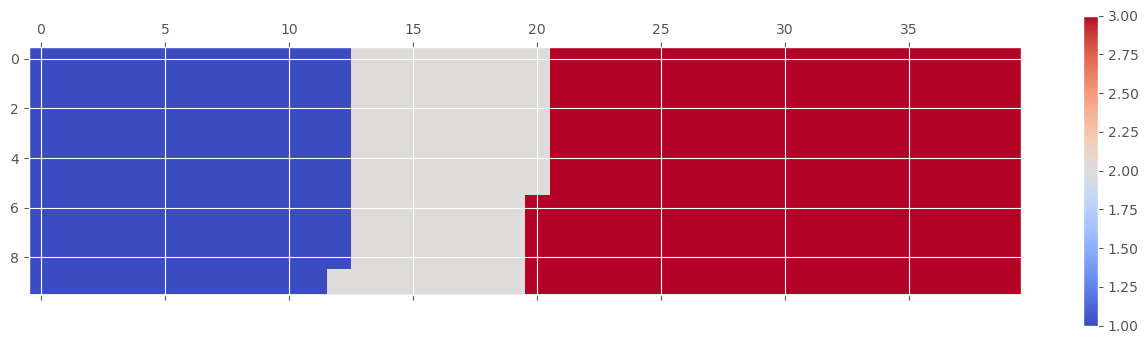

In [18]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

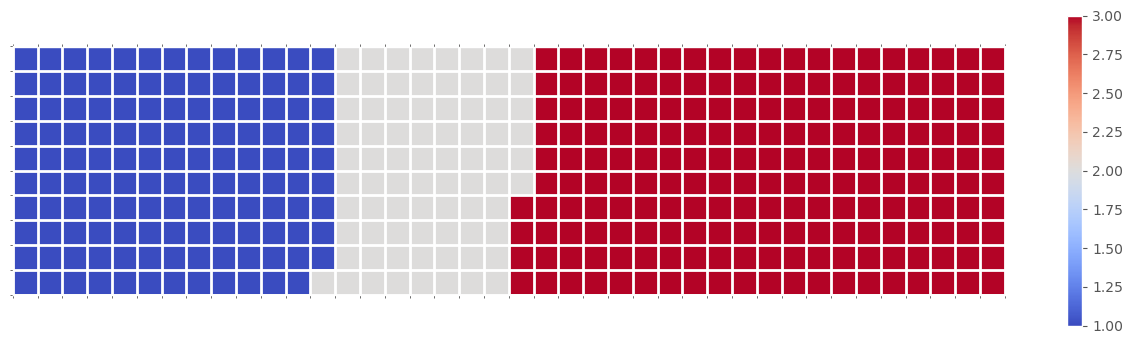

In [19]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 640x480 with 0 Axes>

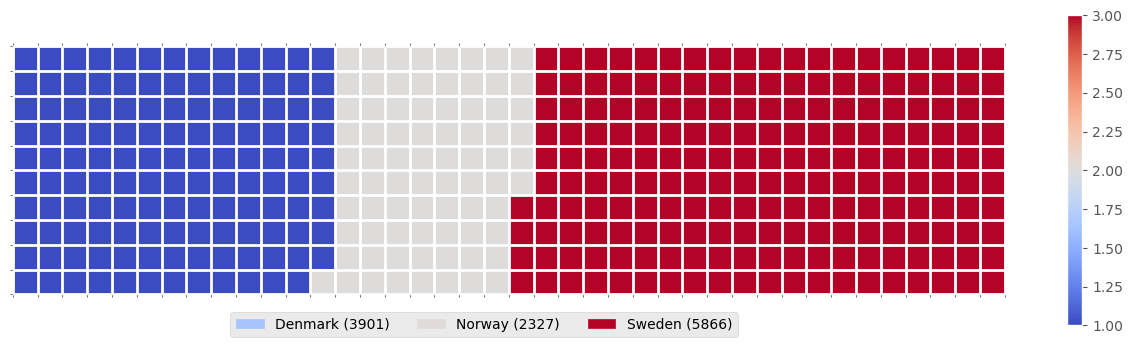

In [20]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
          loc='lower center',
          ncol=len(df_dsn.index.values),
          bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [21]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    
    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]
    
    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
        
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))
    
    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0
    
    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1
            
            # if the number of tiles populated for the current category
            # is equal to its corresponding allovated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...procees to the next category
                category_index += 1
                
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
            
    # instantiate a new figure object
    fig = plt.figure()
    
    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()
    
    # get the axis
    ax = plt.gca()
    
    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    
    plt.xticks([])
    plt.yticks([])
    
    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(df_dsn['Total'])
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + values_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
        
    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [22]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

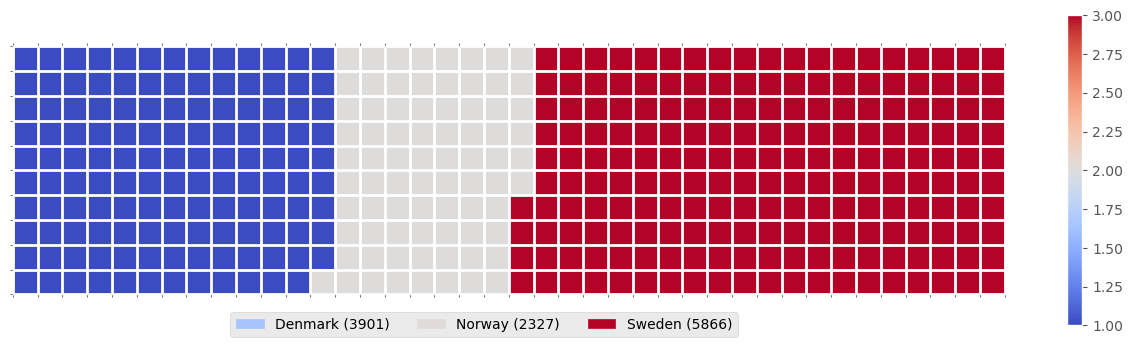

In [23]:
create_waffle_chart(categories, values, height, width, colormap)

In [24]:
### WORD CLOUDS ###

In [27]:
# install wordcloud
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
import requests

# import matplotlib.pyplot as plt

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [29]:
# URL dari file yang akan diunduh
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt"

# Nama file tempat Anda ingin menyimpan file yang diunduh
alice_novel = "alice_novel.txt"

# Mengunduh file
response = requests.get(url)

# Baca isi file teks yang telah diunduh
alice_novel = "alice_novel.txt"  # Ganti dengan nama file yang telah Anda unduh
try:
    with open(alice_novel, 'r') as file:
        alice_nvl = file.read()
except FileNotFoundError:
    print('File tidak ditemukan.')

In [30]:
stopwords = set(STOPWORDS)

In [33]:
# Membuat objek WordCloud
alice_wc = WordCloud(width=800, height=400,
                     background_color='white',
                     max_words=2000,
                     stopwords=stopwords
                    )

# generate the word cloud
alice_wc.generate(alice_nvl)

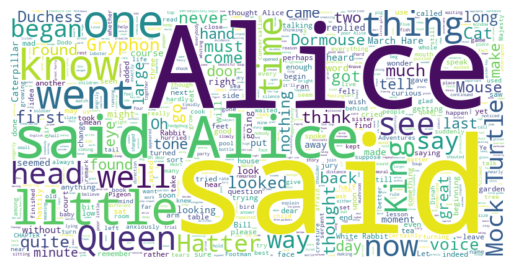

In [34]:
# display the word cloud dengan menampilkan word cloud menggunakan Matplotlib
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu x dan y
plt.show()

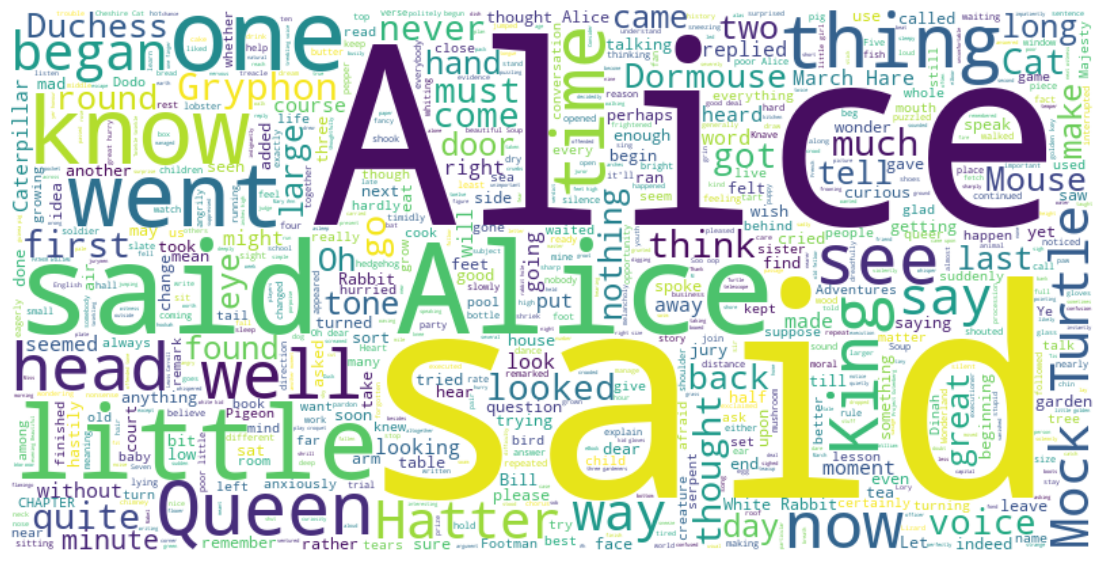

In [35]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

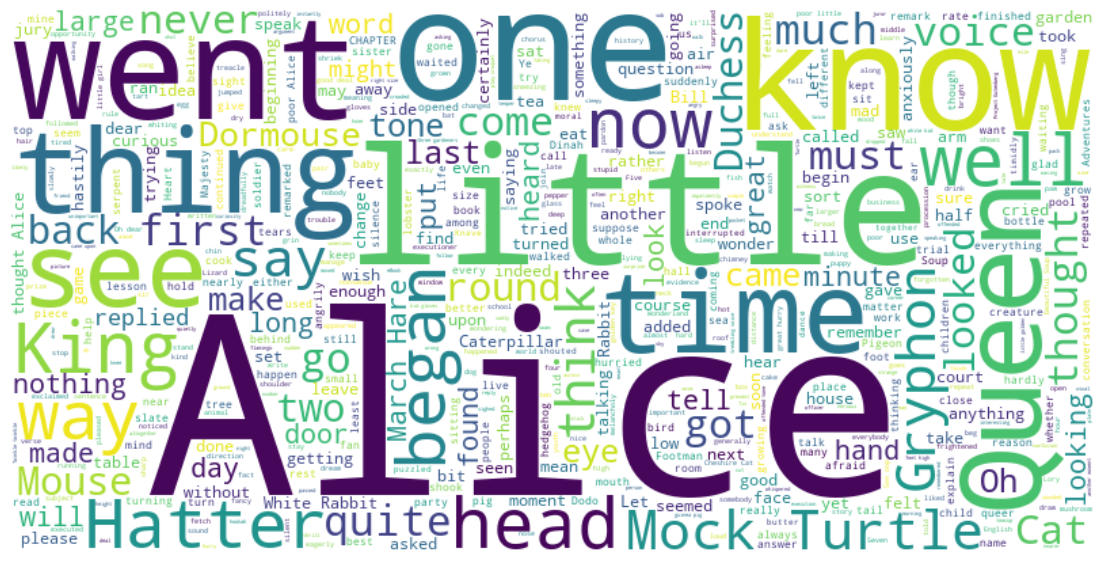

In [37]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_nvl)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
pip install requests pillow

Note: you may need to restart the kernel to use updated packages.


In [47]:
import requests
from PIL import Image
from io import BytesIO

# URL dari file PNG yang akan diunduh
gmbr_alice = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png"

# Mengunduh file
response = requests.get(gmbr_alice)

# Memeriksa apakah unduhan berhasil
if response.status_code == 200:
    # Mengonversi konten respons ke objek gambar menggunakan Pillow
    img = Image.open(BytesIO(response.content))
    
    # Menyimpan gambar sebagai file PNG
    alice_mask = "alice_mask.png"
    img.save(alice_mask, "PNG")
    
    print('Gambar berhasil diunduh dan disimpan sebagai', alice_mask)
else:
    print('Gagal mengunduh gambar:', response.status_code)

Gambar berhasil diunduh dan disimpan sebagai alice_mask.png


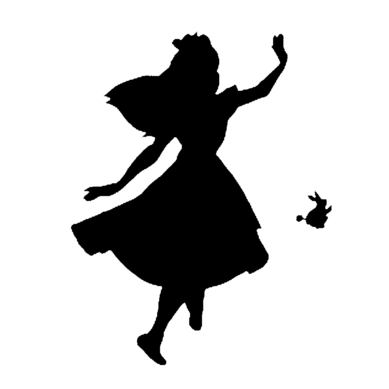

In [51]:
# from PIL import Image
# import matplotlib.pyplot as plt

# Nama file gambar PNG yang ingin ditampilkan
img_alice_mask = "alice_mask.png"

# Membuka gambar dengan Pillow
alice_mask = Image.open(img_alice_mask)

# Menampilkan gambar menggunakan Matplotlib
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu x dan y
plt.show()

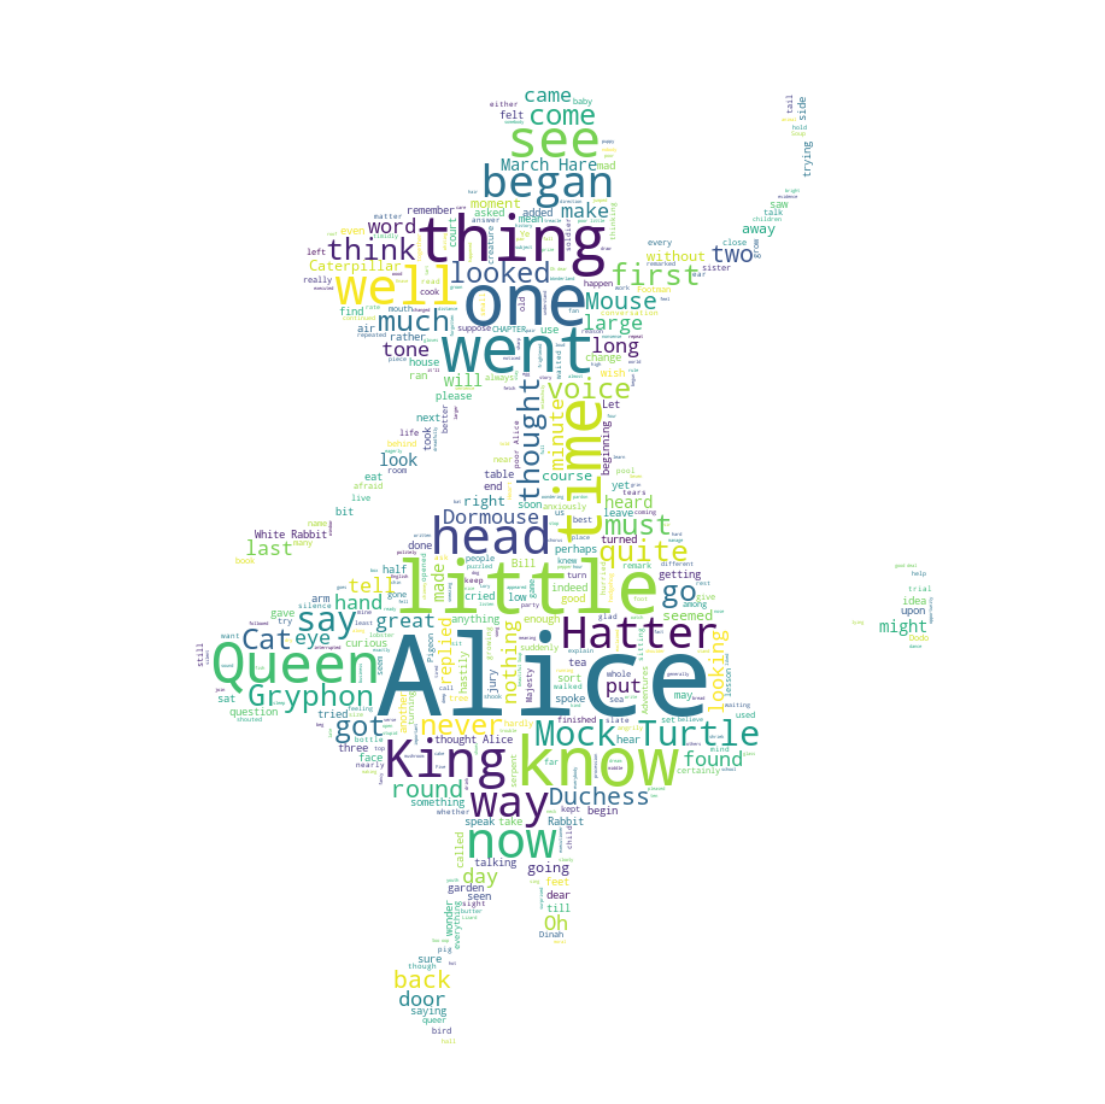

In [54]:
# Mengimpor gambar bentuk yang diinginkan
alice_mask = np.array(Image.open("alice_mask.png"))

# Membuat objek WordCloud dengan menggunakan gambar bentuk
alice_wc = WordCloud(width=800, height=400, background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_nvl)

# display the word cloud dengan menampilkan WordCloud menggunakan matplotlib
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [56]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [57]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country,
'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)


# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [58]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


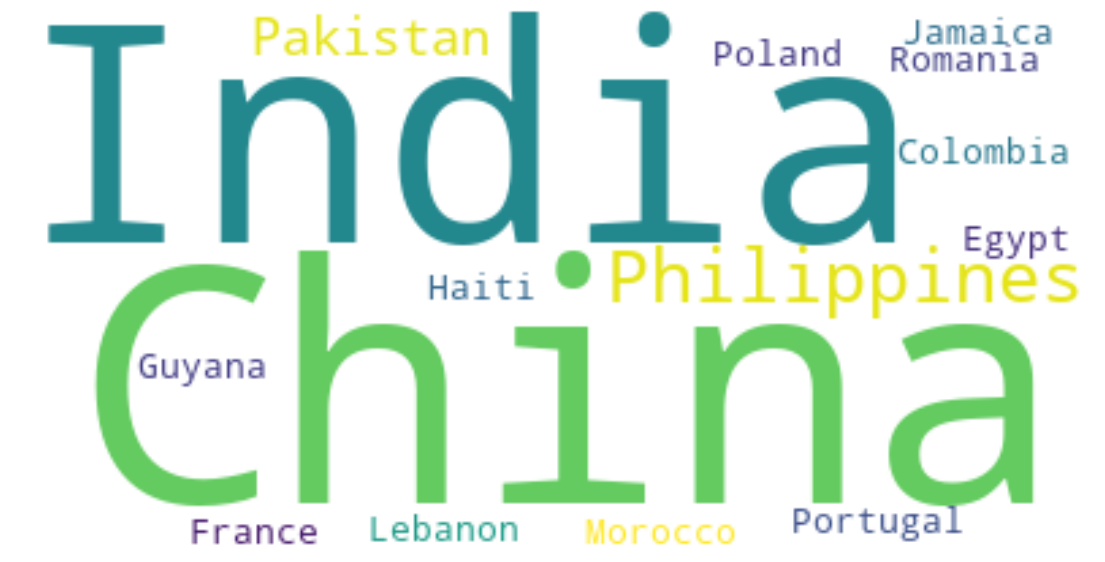

In [59]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
### REGRESSION PLOTS ###

In [61]:
# install seaborn
!pip install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [62]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

year   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

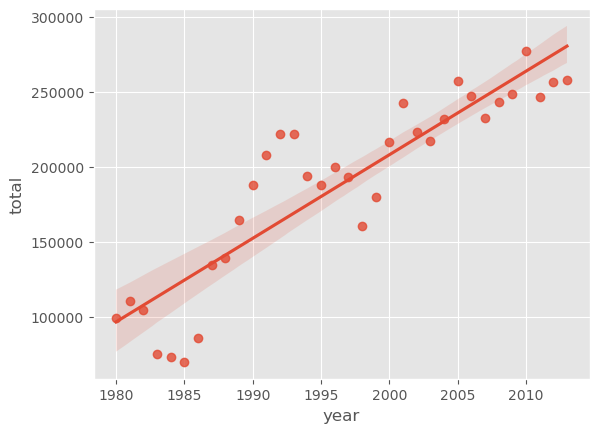

In [63]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

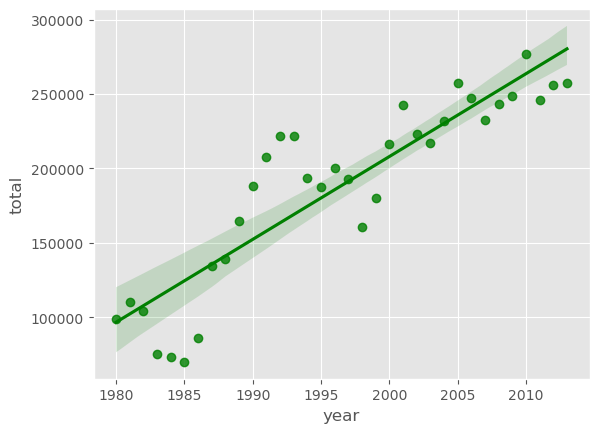

In [64]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

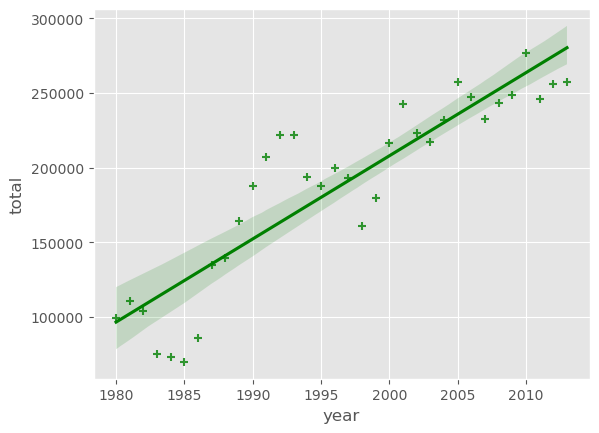

In [66]:
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

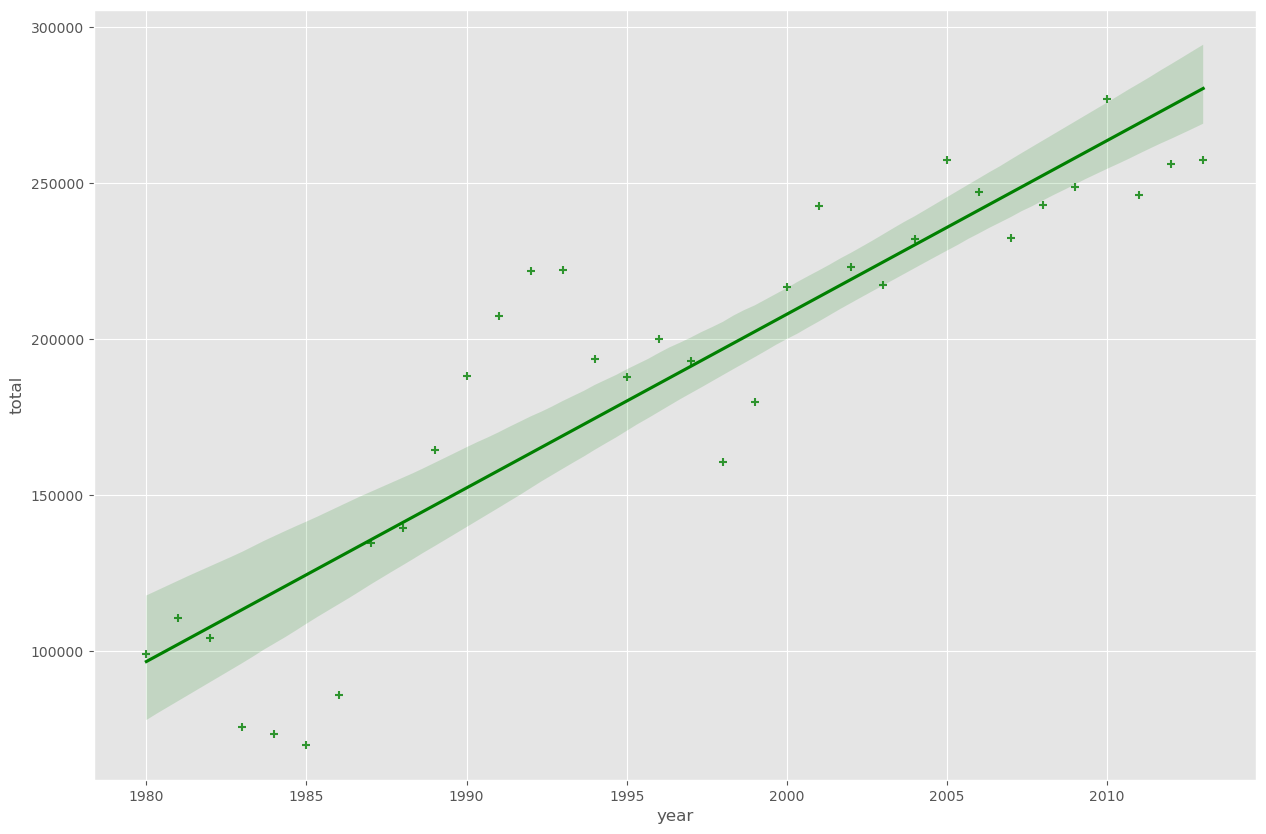

In [67]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

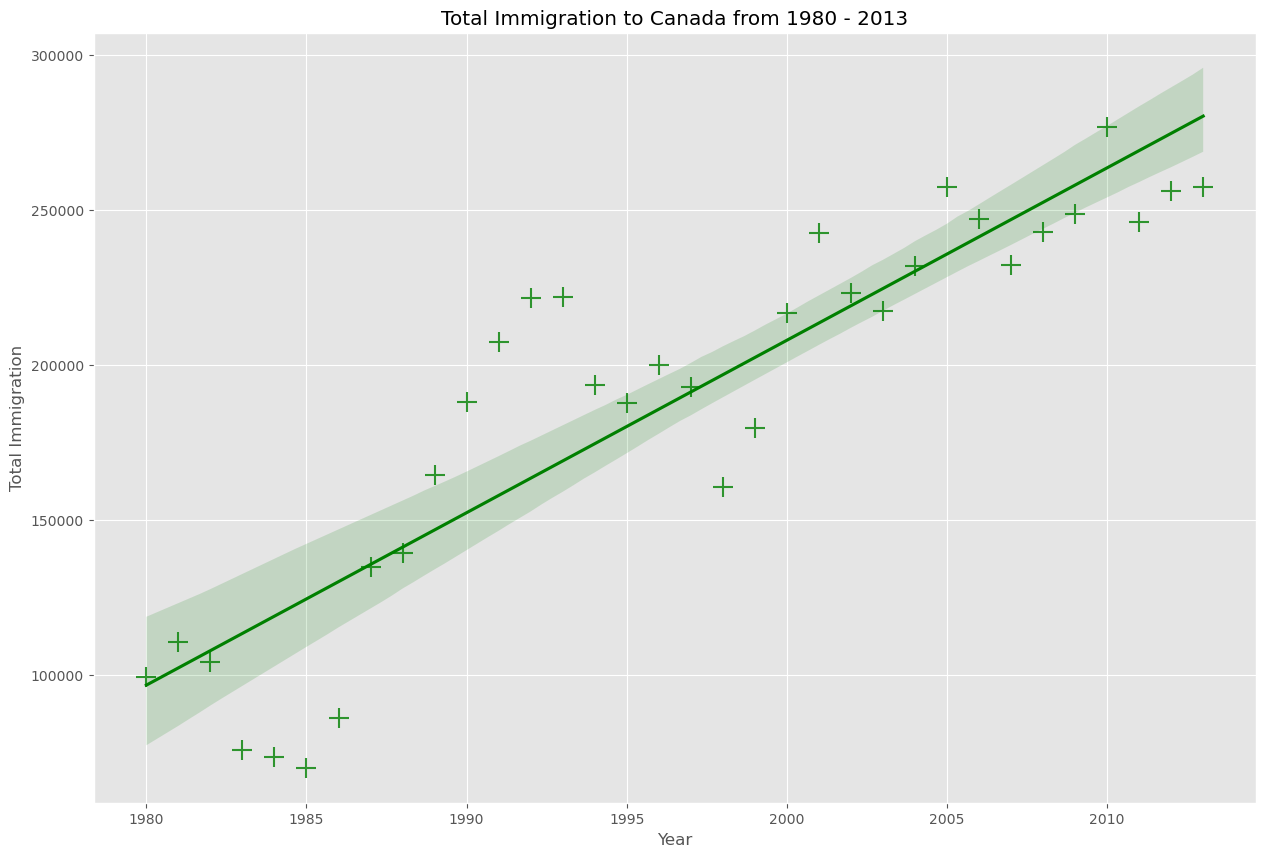

In [68]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

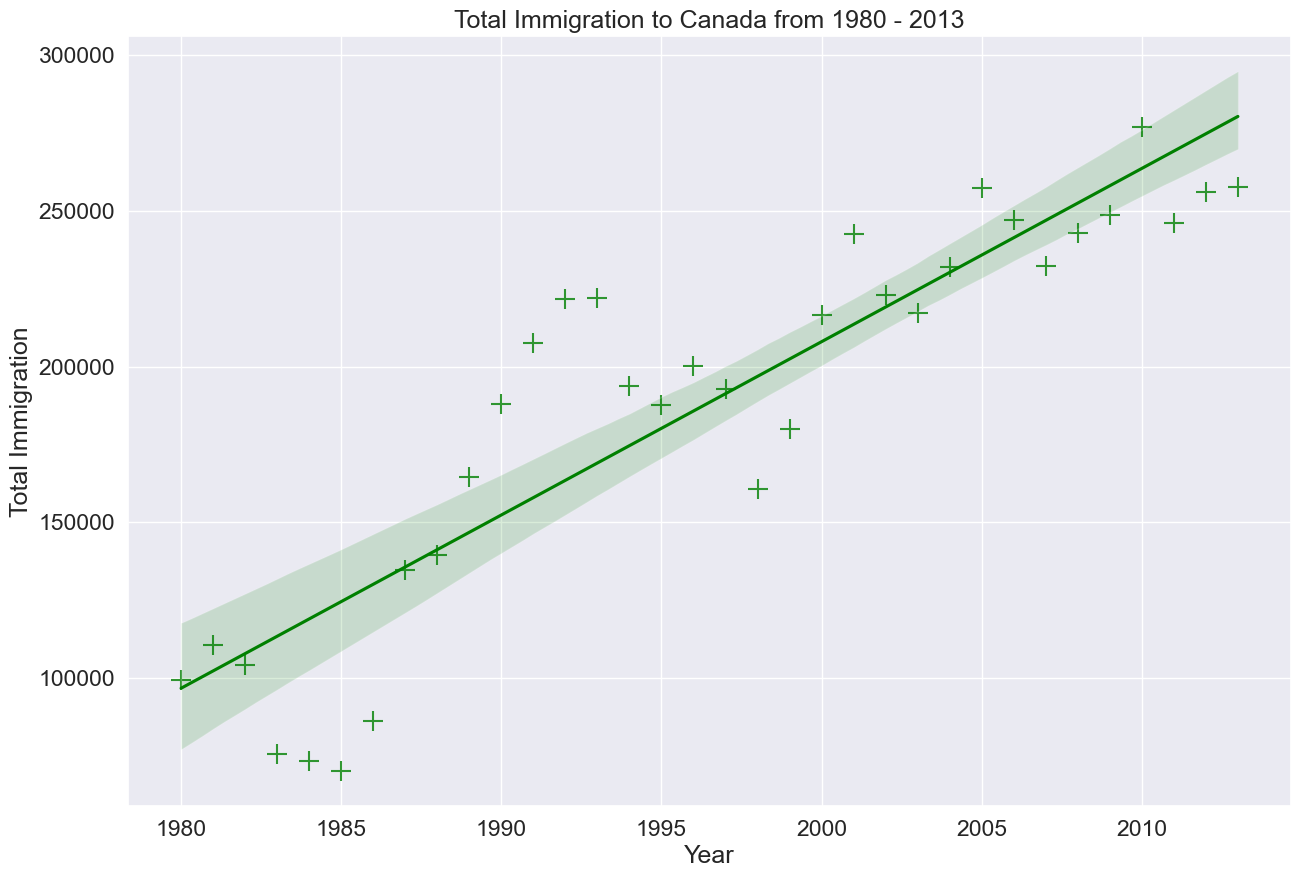

In [69]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

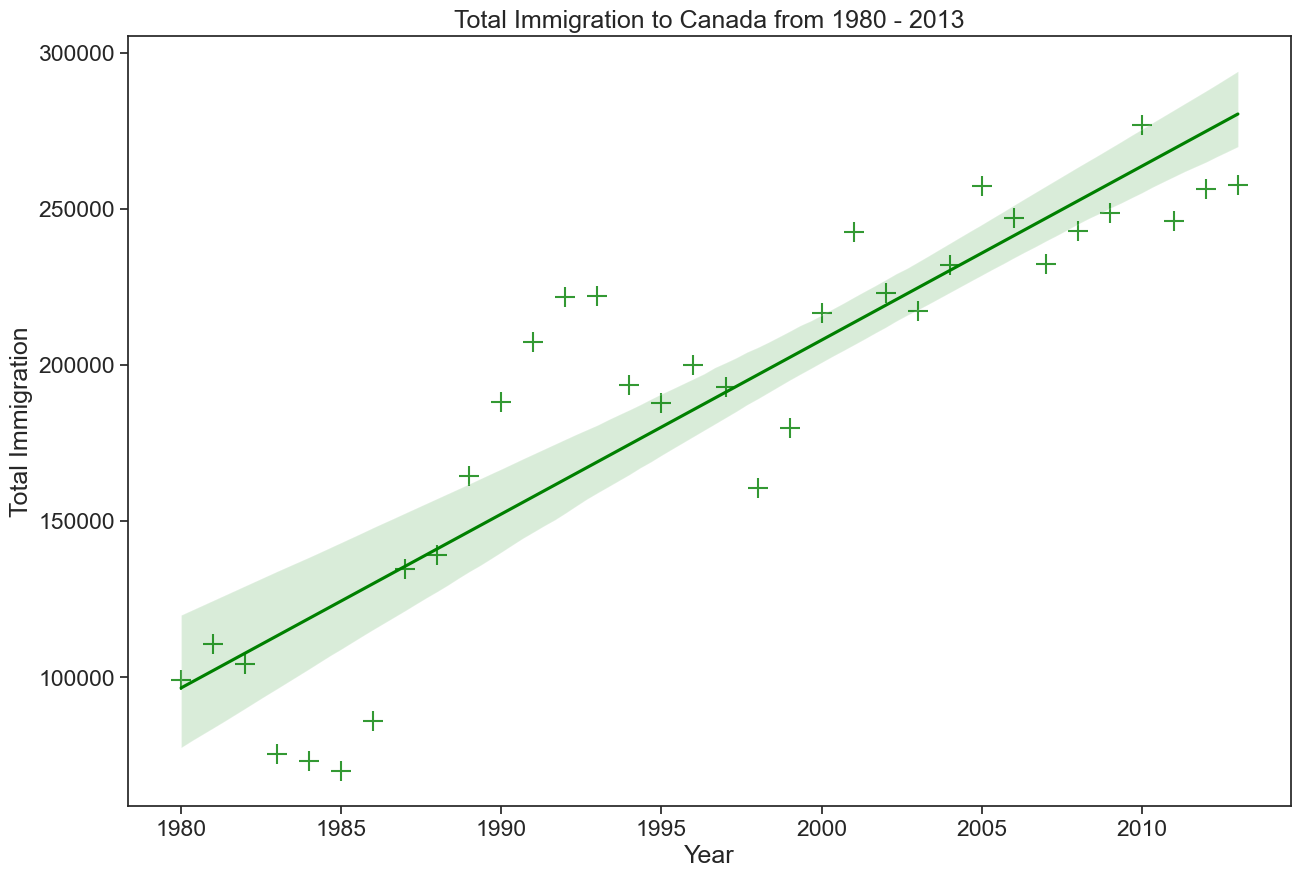

In [70]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

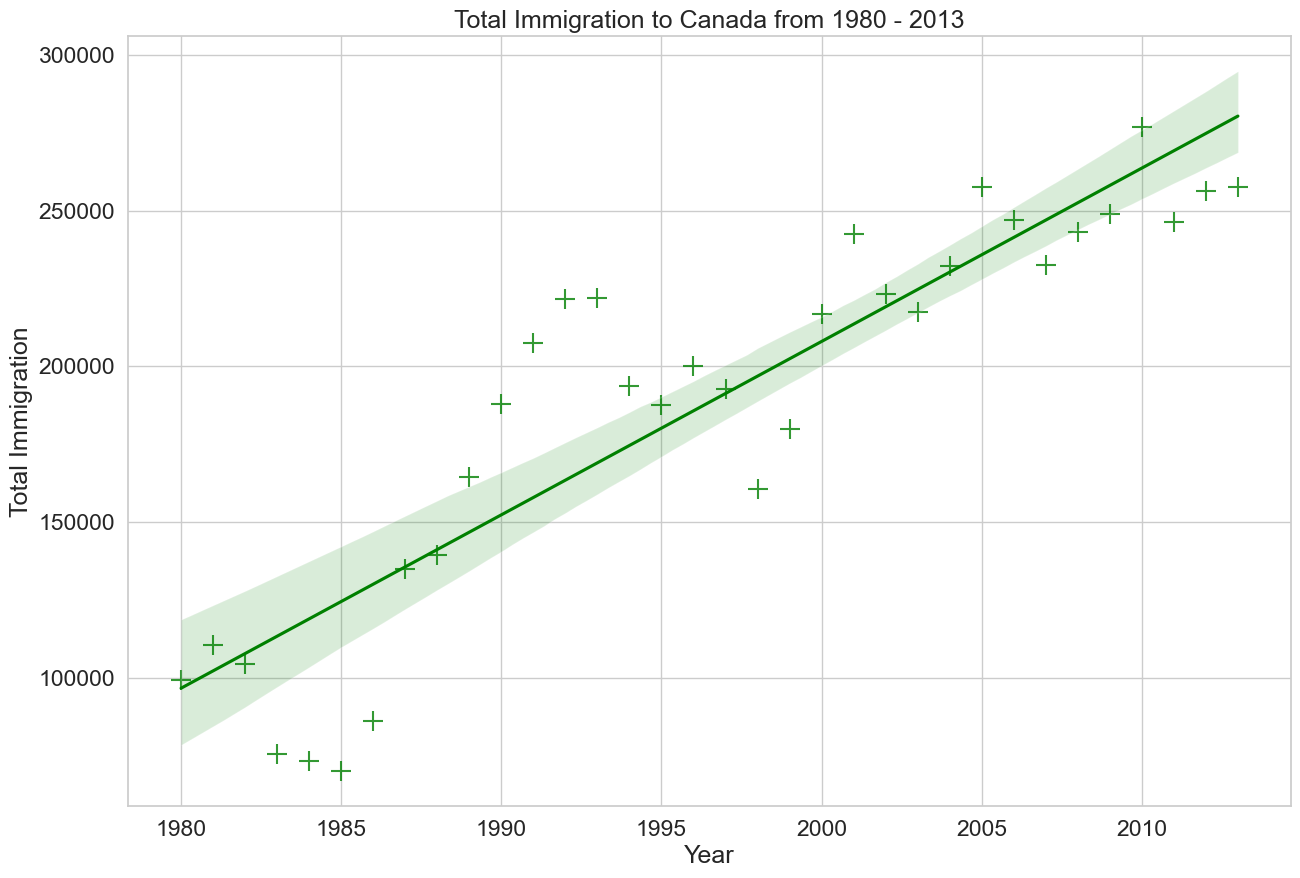

In [71]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

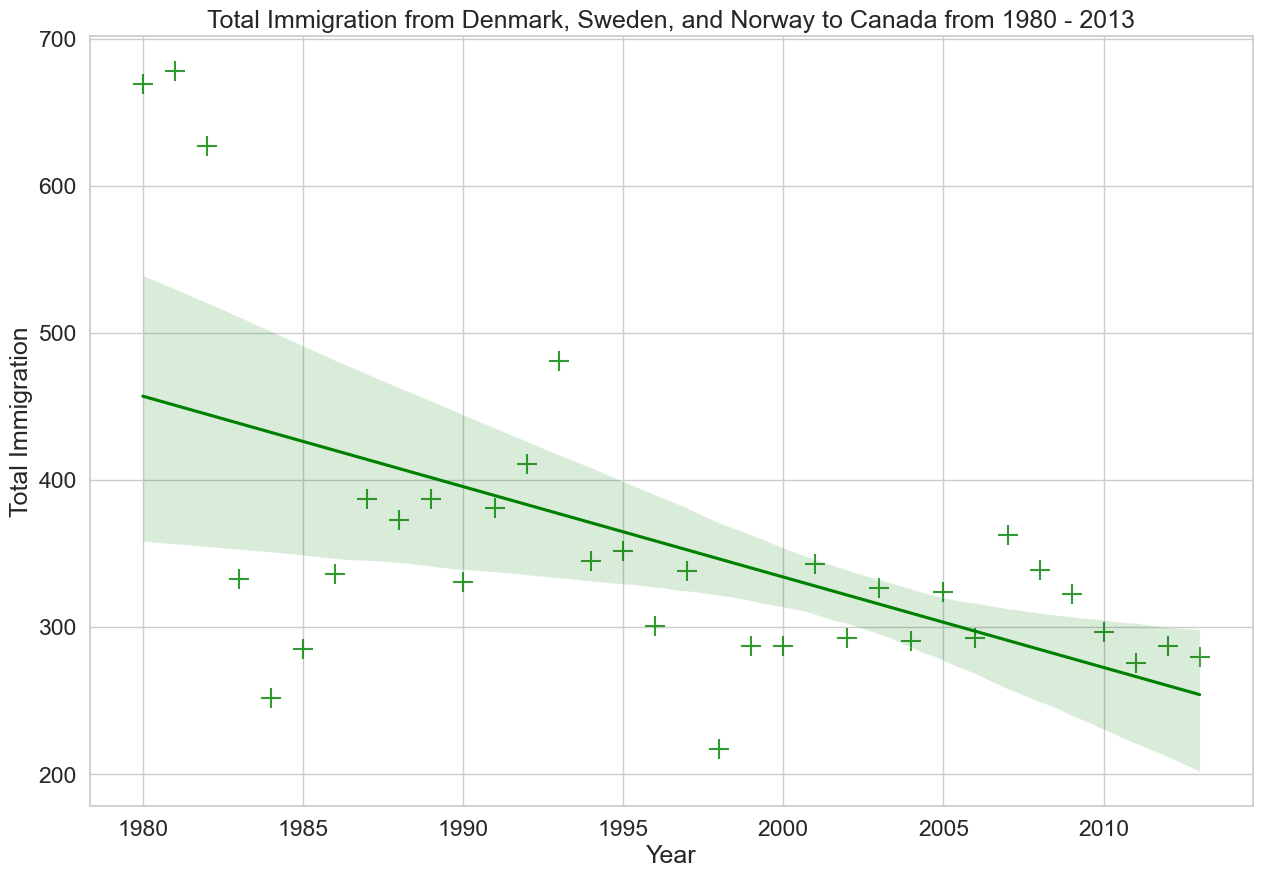

In [73]:
### type your answer here
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
# reset index in place
df_total.reset_index(inplace=True)
# rename columns
df_total.columns = ['year', 'total']
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

In [ ]:
### EXPLORING DATASETS WITH PANDAS AND MATPLOTLIB ###

In [74]:
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

print('Folium installed and imported!')

     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ------------------------------------ --- 92.2/102.3 kB ? eta -:--:--
     -------------------------------------- 102.3/102.3 kB 3.0 MB/s eta 0:00:00
Folium installed and imported!


In [75]:
# define the worl map
world_map = folium.Map()

# display world map
world_map

In [76]:
# define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

# display world map
world_map

In [77]:
# define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)

# display world map
world_map

In [80]:
# create a map of Hacktiv8 with a zoom level of 15
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)

# display world map
world_map

In [81]:
# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=13, tiles='Stamen Toner')

# display world map
world_map

In [82]:
# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=13, tiles='Stamen Terrain')

# display world map
world_map

In [83]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [84]:
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [85]:
df_incidents.shape

(150500, 13)

In [86]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [88]:
df_incidents.shape

(100, 13)

In [89]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [90]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [95]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add evch to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [96]:
# instantiate a fature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

# add incidents to map
sanfran_map.add_child(incidents)

In [97]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each t the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [101]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and vdd evch data point to the mvrk cluster
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [ ]:
### CHOROPLETH MAPS ###

In [102]:
!pip install xlrd

In [103]:
df_can = pd.ExcelFile('Canada (3).xlsx')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [104]:
df_can.sheet_names

['Regions by Citizenship',
 'Canada by Citizenship',
 'Canada by Citizenship (2)']

In [105]:
df_can = df_can.parse(u'Canada by Citizenship', skiprows=range(20), skipfooter=2)
df_can

Type    Coverage          OdName  AREA AreaName   REG  \
0    Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1    Immigrants  Foreigners         Albania   908   Europe   925   
2    Immigrants  Foreigners         Algeria   903   Africa   912   
3    Immigrants  Foreigners  American Samoa   909  Oceania   957   
4    Immigrants  Foreigners         Andorra   908   Europe   925   
..          ...         ...             ...   ...      ...   ...   
190  Immigrants  Foreigners        Viet Nam   935     Asia   920   
191  Immigrants  Foreigners  Western Sahara   903   Africa   912   
192  Immigrants  Foreigners           Yemen   935     Asia   922   
193  Immigrants  Foreigners          Zambia   903   Africa   910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa   910   

                RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0         Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1       Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2       Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3             Polynesia  902  Developing regions     0  ...     0     0     1   
4       Southern Europe  901   Developed regions     0  ...     0     0     1   
..                  ...  ...                 ...   ...  ...   ...   ...   ...   
190  South-Eastern Asia  902  Developing regions  1191  ...  1816  1852  3153   
191     Northern Africa  902  Developing regions     0  ...     0     0     1   
192        Western Asia  902  Developing regions     1  ...   124   161   140   
193      Eastern Africa  902  Developing regions    11  ...    56    91    77   
194      Eastern Africa  902  Developing regions    72  ...  1450   615   454   

     2007  2008  2009  2010  2011  2012  2013  
0    2652  2111  1746  1758  2203  2635  2004  
1     702   560   716   561   539   620   603  
2    3623  4005  5393  4752  4325  3774  4331  
3       0     0     0     0     0     0     0  
4       1     0     0     0     0     1     1  
..    ...   ...   ...   ...   ...   ...   ...  
190  2574  1784  2171  1942  1723  1731  2112  
191     0     0     0     0     0     0     0  
192   122   133   128   211   160   174   217  
193    71    64    60   102    69    46    59  
194   663   611   508   494   434   437   407  

[195 rows x 43 columns]

In [106]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [107]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


In [108]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# for sake of consistency. let's also make all column labels of type string
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 39)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9072\3564904171.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [109]:
df_can.head()

Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  15699  
2  3774  4331  69439  
3     0     0      6  
4     1     1     15  

[5 rows x 39 columns]

In [110]:
import requests
import json

# URL dari file JSON yang akan diunduh
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json"

# Nama file tempat Anda ingin menyimpan file JSON yang diunduh
world_geo = "world_countries.json"

# Mengunduh file JSON
response = requests.get(url)

# Memeriksa apakah unduhan berhasil
if response.status_code == 200:
    # Menyimpan file JSON yang diunduh
    with open(world_geo, 'wb') as file:
        file.write(response.content)
    print('File JSON berhasil diunduh dan disimpan sebagai', world_geo)
else:
    print('Gagal mengunduh file JSON:', response.status_code)

File JSON berhasil diunduh dan disimpan sebagai world_countries.json


In [112]:
# Membuka dan membaca file JSON yang telah diunduh
try:
    with open(world_geo, 'r') as file:
        world_geo_json = json.load(file)
        print('Data JSON:')
        print(world_geo_json)
except FileNotFoundError:
    print('File tidak ditemukan.')

Data JSON:
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.8

In [115]:
world_map = folium.Map(location=[0, 0], zoom_start=2, tile_layer = TileLayer(tiles='Mapbox Bright'))

NameError: name 'TileLayer' is not defined

In [113]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', # Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

ValueError: Built-in templates for Mapbox and Cloudmade have been removed. You can still use these providers by passing a URL to the `tiles` argument. See the documentation of the `TileLayer` class.